In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO

# Sample SNP data
file_path = "sample_snps.csv"
df = pd.read_csv(file_path)

# Data preview
df.head()

,SNP_ID,Chromosome,Position,Reference_Allele,Alternate_Allele,MAF,p-value,Phenotype
0,rs1001,1,123456,A,G,0.12,0.0020,0
1,rs1002,1,234567,C,T,0.08,0.0300,1
2,rs1003,2,345678,G,A,0.15,0.0001,1
3,rs1004,3,456789,T,C,0.05,0.5000,0
4,rs1005,4,567890,A,G,0.02,0.0010,1


In [4]:
# Filter SNPs with a frequency of less than 5%
maf_threshold = 0.05
df_filtered = df[df["MAF"] >= maf_threshold]

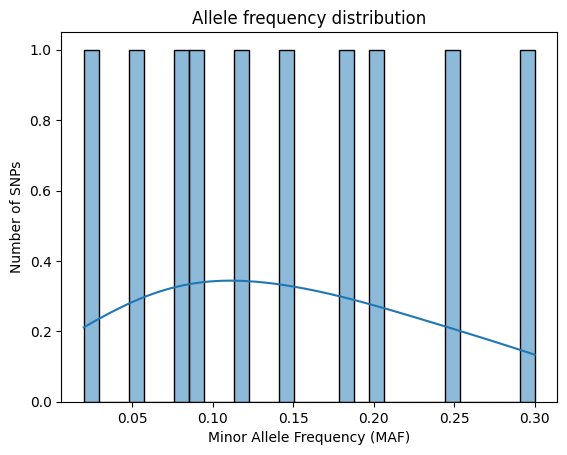

In [5]:
# Allele frequency distribution
sns.histplot(df["MAF"], bins=30, kde=True)
plt.xlabel("Minor Allele Frequency (MAF)")
plt.ylabel("Number of SNPs")
plt.title("Allele frequency distribution")
plt.show()

In [9]:
df = pd.read_csv("sample_snps.csv", header=0) 
print(df.head())

   SNP_ID  Chromosome  Position Reference_Allele Alternate_Allele   MAF  \
0  rs1001           1    123456                A                G  0.12   
1  rs1002           1    234567                C                T  0.08   
2  rs1003           2    345678                G                A  0.15   
3  rs1004           3    456789                T                C  0.05   
4  rs1005           4    567890                A                G  0.02   

   p-value  Phenotype  
0   0.0020          0  
1   0.0300          1  
2   0.0001          1  
3   0.5000          0  
4   0.0010          1  


In [8]:
# Analysing SNP phenotype association
import scipy.stats as stats

# Example chi-square test for SNP vs. binary trait (e.g. disease)
contingency_table = pd.crosstab(df["SNP_ID"], df["Phenotype"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 10.000000000000002, p-value: 0.3504852123233616


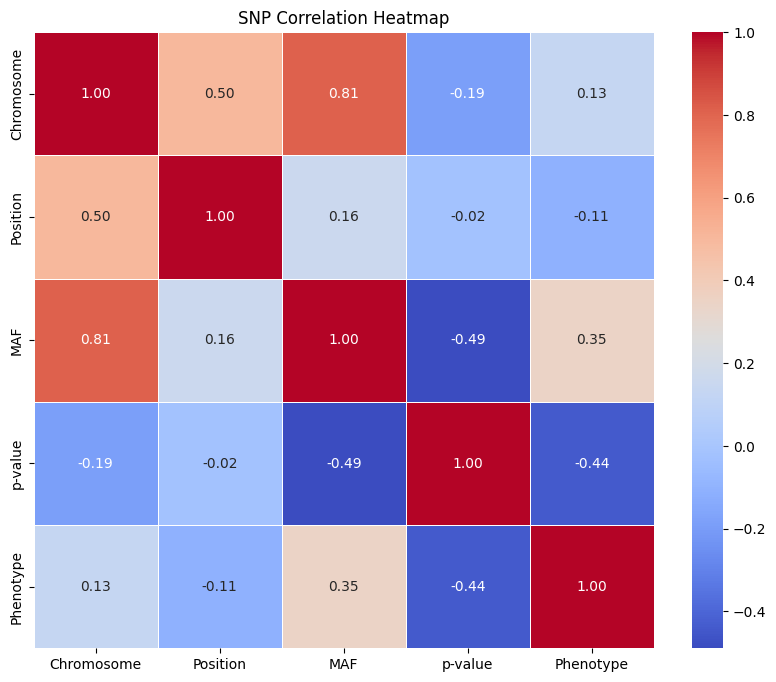

In [12]:
# Select only numeric columns
df_numeric = df_filtered.select_dtypes(include=['number'])

# Checking if we have the right data
if df_numeric.shape[1] > 1:
    corr_matrix = df_numeric.corr()

    # Visualization of SNP correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("SNP Correlation Heatmap")
    plt.show()
else:
    print("There are not enough numeric columns to calculate the correlation.")

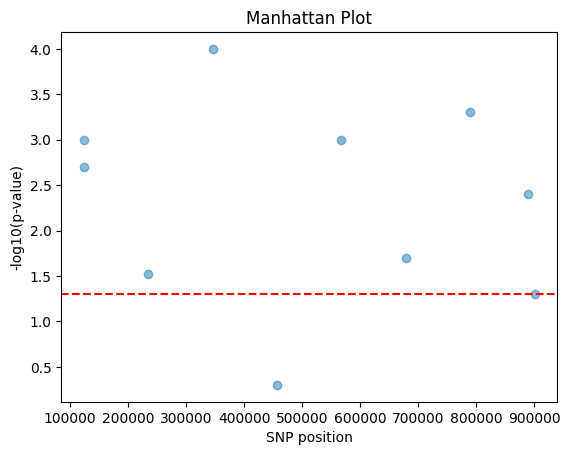

In [15]:
# Manhattan Plot (SNP vs. P-value)

df["neg_log_p"] = -np.log10(df["p-value"])
plt.scatter(df["Position"], df["neg_log_p"], alpha=0.5)
plt.axhline(-np.log10(0.05), color='r', linestyle='--')  # Materiality threshold
plt.xlabel("SNP position")
plt.ylabel("-log10(p-value)")
plt.title("Manhattan Plot")
plt.show()

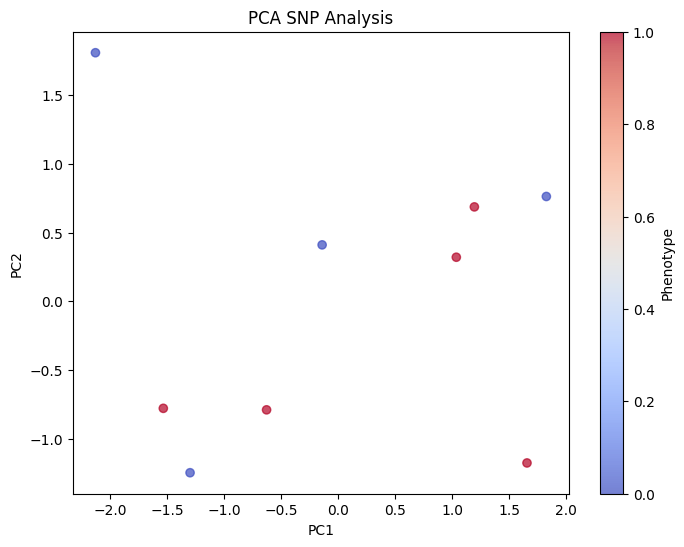

In [19]:
# PCA – SNP analysis on the PCA chart

from sklearn.decomposition import PCA

# We only select numeric columns
df_numeric = df_filtered[["Chromosome", "Position", "MAF", "p-value"]]

# Data standardization
df_scaled = (df_numeric - df_numeric.mean()) / df_numeric.std()

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df_filtered["Phenotype"], cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA SNP Analysis")
plt.colorbar(label="Phenotype")
plt.show()
